### NOTEBOOK DESCRIPTION:

This notebook does the axis projection based on age and gender axis as well as a validation technique based on the generated axis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scriptpath = "/home/jouven/youtube_projects/"
sys.path.append(os.path.abspath(scriptpath))

from helpers.helpers_channels_more_300 import *
from helpers.helpers_channel_embedding import *
from helpers.helpers_visualization_axis_projection import *

### Selected parameters for the axis projection

In [2]:
# Number of neirest neighbors taken
k = 10

# Selected number of pairs to create the axis
nb_selected_pairs = 10

### Useful functions

In [3]:
PATH = '/dlabdata1/youtube_large/jouven/word2vec_pytorch/run_channels_more_300/CONTEXT_True_20_SUBSAMPLING_False_0.0043/models/embedding0.csv.gz'

In [4]:
dict_channel_ind, dict_ind_channel, channels_id = filtered_channels_index_id_mapping()

## Finding cultural axis for our channel embedding

In [5]:
# Channels having more than 500'000 subscribers are selected to create the axis.
with open("/dlabdata1/youtube_large/jouven/channels_more_300/channels_more_500k_subs.pkl",'rb') as f:
     selected_channels_id = set(pickle.load(f))
f.close()

selected_channels = []
for channel in selected_channels_id:
    selected_channels.append(dict_channel_ind[channel])

In [6]:
channelcrawler_projection = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
# Select the rows being in the select channels
channelcrawler_projection = channelcrawler_projection[channelcrawler_projection['channel'].apply(lambda row: row in selected_channels_id)]

In [7]:
channelcrawler_projection.head()

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087


### Gender axis: men vs women

In [8]:
# Here you will find everything about: Men's Fashion, Hairstyle, Fitness & Health, Personal Vlogs and Tech.
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Alex Costa']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2519,Howto & Style,2011-09-29,UCZyCposXwcyopaACep44maQ,Alex Costa,2120000,543,5370.0,2.417


In [9]:
# vlog channel about make up, hair transformation, rings selections, ...
channelcrawler_projection[channelcrawler_projection['name_cc'] == 'Shaaanxo']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1737,Howto & Style,2009-01-18,UCMpOz2KEfkSdd5JeIJh_fxw,Shaaanxo,3215340,1422,3566.0,2.278


In [10]:
gender_seed = (dict_channel_ind['UCMpOz2KEfkSdd5JeIJh_fxw'], dict_channel_ind['UCZyCposXwcyopaACep44maQ'])

gender_axis, df_gender_axis = compute_axis_vector_based_on_seed(PATH, k, gender_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)


In [11]:
df_gender_axis

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
1107,Entertainment,2007-04-07,UC1KdVb6D5C0pJqEA8cZPL6Q,NICOLE SKYES,4410000,500,2166.0,2.1380
163,Entertainment,2006-07-18,UCMNmwqCtCSpftrbvR3KkHDA,Guava Juice,14300000,1380,250.0,2.0870
2740,Howto & Style,2010-07-05,UC5lRKBgDMpPas8-VP3wsh0A,Kaushal Beauty,2200000,365,5936.0,2.4615
55,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0,2.0870
636,Gaming,2010-08-20,UCqg2eLFNUu3QN3dttNeOWkw,iHasCupquake,6620000,4261,1109.0,2.0870
61,Gaming,2012-07-14,UCS5Oz6CHmeoF7vSad0qqXfw,DanTDM,22100000,3211,109.0,2.0870
4806,Howto & Style,2012-02-17,UCl0kP-Cfe-GGic7Ilnk-u_Q,Everyday Food,1330000,1836,11220.0,2.6465
323,Science & Technology,2008-03-21,UCBJycsmduvYEL83R_U4JriQ,Marques Brownlee,9400000,1148,530.0,2.0870
7072,Howto & Style,2011-10-10,UCDF8TA3VX6yO794hBmBwQow,Missy Sue,945000,441,17586.0,2.8260
59,Entertainment,2008-06-13,UC55IWqFLDH1Xp7iu1_xknRA,Colors TV,20200000,32696,107.0,2.0870


### Age axis: kids vs adult

In [753]:
# Animation for kids
channelcrawler_projection[channelcrawler_projection['name_cc'] == "Magpiepony"]

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
8280,Film and Animation,2013-12-17,UCISF5OGuAtSLNF24TKTnXag,Magpiepony,736000,304,21120.0,2.9225


In [754]:
# Channel analysing the films
channelcrawler[channelcrawler['name_cc'] == 'Beyond The Trailer']

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
7841,Entertainment,2008-11-03,UCAXR2zenCwvRIyQd9ydtfaA,Beyond The Trailer,853000,5064,19744.0,2.8635


In [755]:
age_seed = (dict_channel_ind['UCISF5OGuAtSLNF24TKTnXag'], dict_channel_ind['UCAXR2zenCwvRIyQd9ydtfaA'])

age_axis, df_output_age = compute_axis_vector_based_on_seed(PATH, k, age_seed, nb_selected_pairs, selected_channels, channelcrawler_projection, dict_ind_channel)

             0       1  similarity
78998    87795  105471    0.391394
113645  126111   67569    0.362941
74774    83224   12462    0.343508
76586    85233  105471    0.337547
78999    87795   91671    0.335485
...        ...     ...         ...
63618    70846   47267   -0.349494
31168    34726   17080   -0.351403
66156    73771   91671   -0.380957
35117    39065   17080   -0.405666
31167    34726   47267   -0.433405

[116770 rows x 3 columns]
87795.0
126111.0
83224.0
85233.0
87795.0
83224.0
12351.0
21862.0
60471.0
100840.0
28405.0
76397.0
85233.0
70437.0
1539.0
49213.0


In [756]:
df_output_age

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
2700,Gaming,2013-06-18,UCfR-4yZACIMRs3wNf0hel6g,Bijuu Mike,2120000,1808,5865.0,2.4595
185,Comedy,2014-08-30,UCo8bcnLyZH8tBIH9V1mLgqQ,TheOdd1sOut,12700000,113,288.0,2.0870
5995,Pets & Animals,2015-11-13,UCyIqcxz-vR_o2GK4HWuZL8w,CatPusic,1010000,113,14497.0,2.8400
215,Entertainment,2012-07-17,UCWOA1ZGywLbqmigxE4Qlvuw,Netflix,11100000,3166,346.0,2.0870
345,Entertainment,2008-04-27,UCdAt_KUKt0g9ZRQ7gwKaN3A,Ranz Kyle,9277283,263,568.0,2.0870
243,Entertainment,2007-01-06,UC5BMQOsAB8hKUyHu9KI6yig,KBS World TV,10800000,37513,395.0,2.0870
158,Howto & Style,2017-10-30,UC57XAjJ04TY8gNxOWf-Sy0Q,5-Minute Crafts KIDS...,15300000,2043,242.0,2.0870
55,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0,2.0870
5165,Film and Animation,2013-06-24,UC9qgVkKRZUXcgHdf35Z-8dw,My Little Pony Offic...,874016,1840,12248.0,2.6960
37,Music,2009-12-13,UC-8Q-hLdECwQmaWNwXitYDw,KatyPerryVEVO,26000000,132,79.0,2.0870


## Validation of the created axis

In [678]:
EMBEDDING = get_dataframe_in_embedding_space(PATH)

In [679]:
# Select the rows being in the select channels (english channels)
channelcrawler = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.tsv.gz", sep='\t')
channelcrawler = channelcrawler[channelcrawler['channel'].apply(lambda row: row in channels_id)]

In [612]:
dict_idx_name, dict_name_idx = channel_to_name(channelcrawler, dict_channel_ind)

#### 1. Projection of the gender axis

In [633]:
df_gender_projection = create_projection(EMBEDDING, gender_axis)

In [634]:
df_gender_projection.head()

,name,projection
0,Winded Voyage Sailin...,1.915647
1,The Night Fury,-1.838031
2,Red Bull Surfing,-0.795565
3,Heidi Joubert,0.911597
4,MR JC,-0.642384


In [635]:
seed_gender_name = ('Alex Costa', 'Shaaanxo')

No handles with labels found to put in legend.


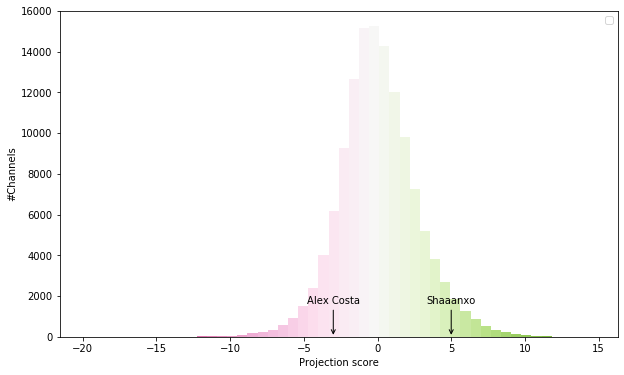

In [641]:
visualization(df_gender_projection, seed_gender_name, 'PiYG', 56, 'Distribution of the gender axis projection scores')

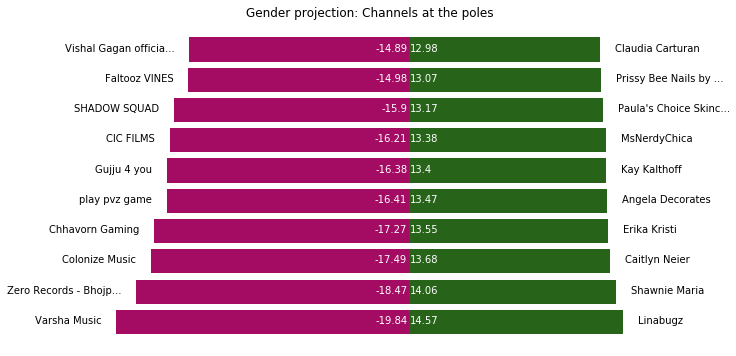

In [660]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_gender_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_gender_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the poles", (10, 6))

In the plot above, negative projection value should correspond to men channel whereas positive projection value should correspond to women channel.

When looking at every girl channel we observe that the results is perfect with clearly women channel. However, for the men side, we observe mainly Indian channel and also some gaming channel such as `play pvz game` or `Chhavorn Gaming`.

In [657]:
'''
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(0)
df_left  = df_gender_projection[~mask]
df_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = ['projection'])
df_right = df_gender_projection[mask]
df_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = ['projection'], ascending = False)
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))
'''

'\ncolor = \'PiYG\'\ncm = plt.cm.get_cmap(color)\nselected_pairs = 10\n\nmask     = df_gender_projection[\'projection\'].gt(0)\ndf_left  = df_gender_projection[~mask]\ndf_left  = df_left.iloc[random.sample(list(np.arange(len(df_left))), selected_pairs)].sort_values(by = [\'projection\'])\ndf_right = df_gender_projection[mask]\ndf_right = df_right.iloc[random.sample(list(np.arange(len(df_right))), selected_pairs)].sort_values(by = [\'projection\'], ascending = False)\ncreate_plot(df_left, df_right, selected_pairs, "Gender projection: Channels taken at random", (7, 6))\n'

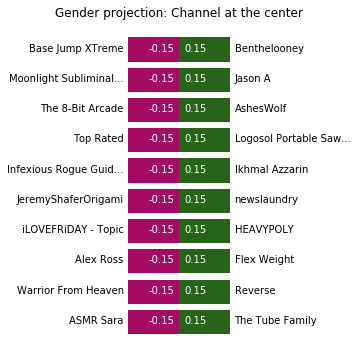

In [656]:
color = 'PiYG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_gender_projection['projection'].gt(-0.15)
df_left  = df_gender_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_gender_projection['projection'].gt(0.15)
df_right = df_gender_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channels at the center", (2, 6), 7)

For channels at the borders we also observe a good classification of the different channels even if sometimes channels are hard to classify in terms of men vs women projection.

Indeed, for example `Bentheloony` a cartoon channel, `Jason A` exposing statements made by celebrities or `The Tube Family` are classify as women channels but it would also make sense to classify them as men channels.

On the men side, we observe a clearer distinction with gaming channels such as `The 8 bit Arcade`, `Infexious Rogue Guidance`, `Warrior From Heaven` or extreme jumps presented by the `Base Jump XTreme` channel.

However, some misclassfications exist: `moonlight subliminals` a girl channel classified as men or `AshesWolf` a gaming channel classified as women. These misclassifcation are maybe due to the number of subscribers which are around 73k for `moonlight subliminals` and around 37k for `AshesWolf`.

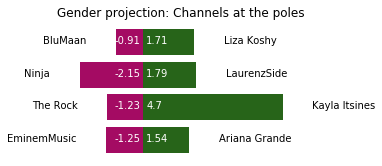

In [663]:
df_left = pd.DataFrame()
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'EminemMusic'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'The Rock'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'Ninja'])
df_left = df_left.append(df_gender_projection[df_gender_projection['name'] == 'BluMaan'])

df_right = pd.DataFrame()
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Ariana Grande'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Kayla Itsines'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'LaurenzSide'])
df_right = df_right.append(df_gender_projection[df_gender_projection['name'] == 'Liza Koshy'])

color = 'PiYG'
cm = plt.cm.get_cmap(color)

create_plot(df_left, df_right, 4, "Gender projection: Selected channels comparison", (4, 2.5))


Select reknown girl or men like channels and validate if these channels are indeed correctly classified.
- first line: fashion channels
- second line: gaming channels
- third line: fitness channels
- fourth line: music channels

#### 2. Projection on the age axis

In [757]:
df_age_projection = create_projection(EMBEDDING, age_axis)
df_age_projection.head()

,name,projection
0,Winded Voyage Sailin...,-1.802662
1,The Night Fury,4.301938
2,Red Bull Surfing,-1.417866
3,Heidi Joubert,-0.582140
4,MR JC,-0.753347


No handles with labels found to put in legend.


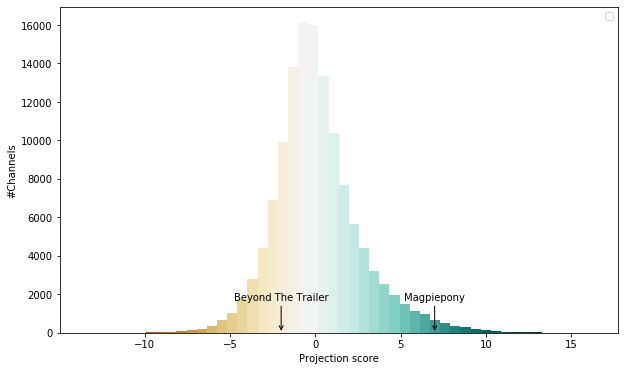

In [759]:
age_seed_name = ("Magpiepony", 'Beyond The Trailer')
visualization(df_age_projection, age_seed_name, 'BrBG', 43, 'Distribution of the age axis projection score')

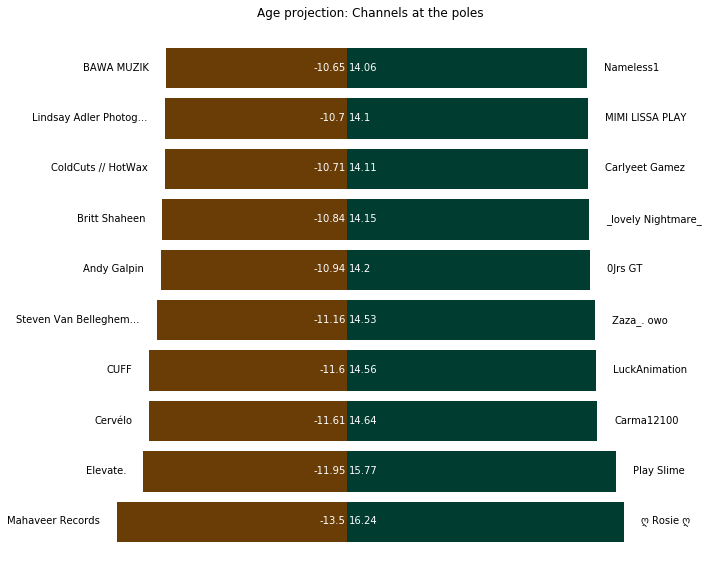

In [760]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

df_left  = df_age_projection.sort_values(by = ['projection'])[:selected_pairs]
df_right = df_age_projection.sort_values(by = ['projection'], ascending = False)[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Age projection: Channels at the poles", (10, 10))

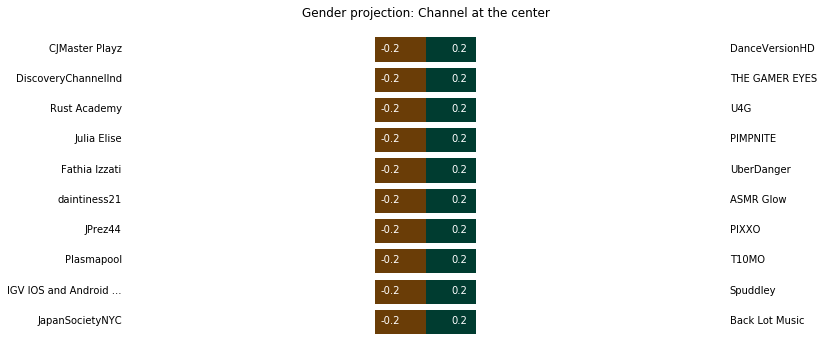

In [762]:
color = 'BrBG'
cm = plt.cm.get_cmap(color)
selected_pairs = 10

mask     = df_age_projection['projection'].gt(-0.2)
df_left  = df_age_projection[~mask].sort_values(by = ['projection'], ascending = False)[:selected_pairs]
mask     = df_age_projection['projection'].gt(0.2)
df_right = df_age_projection[mask].sort_values(by = ['projection'])[:selected_pairs]
create_plot(df_left, df_right, selected_pairs, "Gender projection: Channel at the center", (2, 6), 1)